In [1]:
import pandas as pd
from IPython.display import HTML, display
import folium
from folium import plugins
from folium.plugins import HeatMap
import os
import numpy as np
import geopandas as gpd
from shapely.geometry import Point


In [3]:
accidents=pd.read_csv("data/all_accidents.csv", delimiter=";", decimal=',', dtype={'IstGkfz': int, 
                                                                      'IstSonstige': int, 
                                                                      'XGCSWGS84': float,
                                                                      'YGCSWGS84': float})
accidents.dropna(inplace=True)

In [4]:
bike_accs=accidents[accidents['IstRad']==1]

In [5]:

os.chdir("C:/Users/julia/OneDrive/Documents/ml_bikes")

locs=pd.read_csv("data/locs.csv", delimiter=";", decimal=",")
locs.head()
lat, lon = 52.514700, 13.405803

m=folium.Map(location=[lat, lon],
               zoom_start=11
               )
    
for i, row in locs.iterrows():
    folium.Marker(
    location=[row.Breitengrad, row.Längengrad], # coordinates for the marker (Earth Lab at CU Boulder)
    popup=row['Beschreibung - Fahrtrichtung'], # pop-up label for the marker
    icon=folium.Icon()
    ).add_to(m)



In [6]:
heat_list=[[row.YGCSWGS84, row.XGCSWGS84, 1] for i, row in bike_accs.iterrows()]
HeatMap(heat_list,
        min_opacity=0.05, 
        max_opacity=0.9, 
        radius=50).add_to(folium.FeatureGroup(name='Heat Map').add_to(m))
folium.LayerControl().add_to(m)

In [90]:
m.save("heatmap.html")

In [6]:
roads=pd.read_csv("data/roads.csv")
bike_lanes=pd.read_csv("data/bike_lanes.csv", delimiter=";", decimal=",")
roads_bike_lanes=roads.merge(bike_lanes, left_on=['ELEM_NR'], right_on=['Detailnetzsegment'], how='left')


42568 18641 54467


In [12]:
bike_lanes.head()

,Schlüssel,Identnummer,Detailnetzsegment,Straßenbezeichnung,Straßenname,Bezirk,Ortsteil,RVA-Typ,Typ,Länge [m],Benutzungspflicht
0,1,10-000415,58530025_58530021.01,B1/B5,Alt-Kaulsdorf,Marzahn-Hellersdorf,Kaulsdorf,Radwege,"Geh-/Radweg, durch Markierung unterschieden",26.0,ja
1,2,10-000039,60530006_60530009.01,B1/B5,Alt-Mahlsdorf,Marzahn-Hellersdorf,Mahlsdorf,Radwege,Radfahrerfurt Z 340,16.0,ja
2,3,10-000038,60530005_60530006.01,B1/B5,Alt-Mahlsdorf,Marzahn-Hellersdorf,Mahlsdorf,Radwege,"Geh-/Radweg, durch Markierung unterschieden",510.0,nein
3,4,10-000011,57530025_57530026.01,B1/B5,Alt-Biesdorf,Marzahn-Hellersdorf,Biesdorf,Radwege,"Geh-/Radweg, baulich unterschieden",76.0,ja
4,5,10-000012,57530001_57530017.01,B1/B5,Alt-Biesdorf,Marzahn-Hellersdorf,Biesdorf,Radwege,"Radweg, baulich getrennt",192.0,ja


In [18]:
roads.head()

,FID,ELEM_NR,STRSCHL,STR_NAME,STR_BEZ,STRKLASSE1,STRKLASSE,STRKLASSE2,VRICHT,BEZIRK,STADTTEIL,EBENE,VON_VP,BIS_VP,LAENGE,GILT_VON,OKSTRA_ID,SHAPE_Length
0,1,39680024_39680025.02,2503,Königsbacher Zeile,NaN,V,G,STRA,B,Reinickendorf,Frohnau,0,39680024,39680025,305.49,20120919,2DF19D8DD757441EB9DD663F6B1A2EB2,502.936035
1,2,39680025_39680026.02,2503,Königsbacher Zeile,NaN,V,G,STRA,B,Reinickendorf,Frohnau,0,39680025,39680026,285.78,20120919,D723AAF7E82A4E92A249A6E3209550B4,471.060080
2,3,53440021_53440022.02,2516,Köpenicker Straße,NaN,V,G,STRA,B,Neukölln,Rudow,0,53440021,53440022,17.65,20120919,BB1B5C7078B7471ABEBB72EDD5E3DEDC,28.890307
3,4,53440022_53440023.02,2516,Köpenicker Straße,NaN,V,G,STRA,B,Neukölln,Rudow,0,53440022,53440023,101.17,20120919,0BE1A48028744906864A96595F830790,165.643515
4,5,39630044_39630065.02,7458,Rohrbrunnersteg,NaN,V,F,FUBR,B,Reinickendorf,Tegel,0,39630044,39630065,46.01,20120919,E70D597A99844B75871A523BAC97098E,75.733971


In [7]:
shp=gpd.read_file("data/xn--Straennetz_-_Berlin-otb.geojson")


In [8]:
bike_accs['acc_locs']=[Point(xy) for xy in zip(bike_accs.YGCSWGS84, bike_accs.XGCSWGS84)]

C:\Users\julia\AppData\Local\Temp/ipykernel_26968/4045738476.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike_accs['acc_locs']=[Point(xy) for xy in zip(bike_accs.YGCSWGS84, bike_accs.XGCSWGS84)]


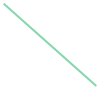

In [26]:
shp.geometry[10]

In [25]:
bike_accs['acc_locs'].iloc[0].within(shp.geometry[1030])

False

In [22]:
bike_accs.reset_index(inplace=True)
bike_accs['street']=''
bike_accs['street_id']=''
bike_accs['tr_direc']=''
bike_accs['str_class']=''
for i, row in bike_accs[:100].iterrows():
    print(i)
    for a, shp_i in shp.iterrows():
        if row['acc_locs'].within(shp_i['geometry']):
            print("it worked")
            row['street']=shp_i['STR_NAME']
            row['street_id']=shp_i['ELEM_NR']
            row['tr_direc']=shp_i['VRICHT']
            row['str_class']=(shp_i['STRKLASSE1'], shp_i['STRKLASSE'], shp_i['STRKLASSE2'])
        

C:\Users\julia\AppData\Local\Temp/ipykernel_26968/3191862039.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike_accs['street']=''
C:\Users\julia\AppData\Local\Temp/ipykernel_26968/3191862039.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike_accs['street_id']=''
C:\Users\julia\AppData\Local\Temp/ipykernel_26968/3191862039.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


4         
12        
13        
14        
16        
        ..
38829     
38833     
38835     
38837     
38839     
Name: street, Length: 15304, dtype: object

In [13]:
bike_accs[:0]

AttributeError: 'DataFrame' object has no attribute 'dim'

In [11]:
shp.head()

,FID,ELEM_NR,STRSCHL,STR_NAME,STR_BEZ,STRKLASSE1,STRKLASSE,STRKLASSE2,VRICHT,BEZIRK,STADTTEIL,EBENE,VON_VP,BIS_VP,LAENGE,GILT_VON,OKSTRA_ID,SHAPE_Length,geometry
0,1,39680024_39680025.02,02503,Königsbacher Zeile,None,V,G,STRA,B,Reinickendorf,Frohnau,0.0,39680024,39680025,305.49,20120919.0,2DF19D8DD757441EB9DD663F6B1A2EB2,0.003946,"MULTILINESTRING ((13.29229 52.63875, 13.29243 ..."
1,2,39680025_39680026.02,02503,Königsbacher Zeile,None,V,G,STRA,B,Reinickendorf,Frohnau,0.0,39680025,39680026,285.78,20120919.0,D723AAF7E82A4E92A249A6E3209550B4,0.002864,"MULTILINESTRING ((13.29586 52.64037, 13.29590 ..."
2,3,53440021_53440022.02,02516,Köpenicker Straße,None,V,G,STRA,B,Neukölln,Rudow,0.0,53440021,53440022,17.65,20120919.0,BB1B5C7078B7471ABEBB72EDD5E3DEDC,0.000255,"MULTILINESTRING ((13.50912 52.42288, 13.50937 ..."
3,4,53440022_53440023.02,02516,Köpenicker Straße,None,V,G,STRA,B,Neukölln,Rudow,0.0,53440022,53440023,101.17,20120919.0,0BE1A48028744906864A96595F830790,0.001442,"MULTILINESTRING ((13.50937 52.42291, 13.50959 ..."
4,5,39630044_39630065.02,07458,Rohrbrunnersteg,None,V,F,FUBR,B,Reinickendorf,Tegel,0.0,39630044,39630065,46.01,20120919.0,E70D597A99844B75871A523BAC97098E,0.000504,"MULTILINESTRING ((13.29991 52.59437, 13.30011 ..."
